# California House Prediction

DataSet used from => https://www.kaggle.com/datasets/camnugent/california-housing-prices

Conatains Nan values , has about 20640 rows with 10 features , we preprocess , add new featues , remove string like features and use a Linear Regression and RandomForestRegression

## NoteBook Setup

In [1]:
# Standard imports
import os

In [2]:
# Third party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.shape

(20640, 10)

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data.dropna(inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### Preprocess

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'],axis = 1)
Y = data['median_house_value']

In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25)

In [12]:
train_data = X_train.join(Y_train)

In [13]:
Xt,Xv,Yt,Yv = train_test_split(X_train,Y_train,test_size=0.25)

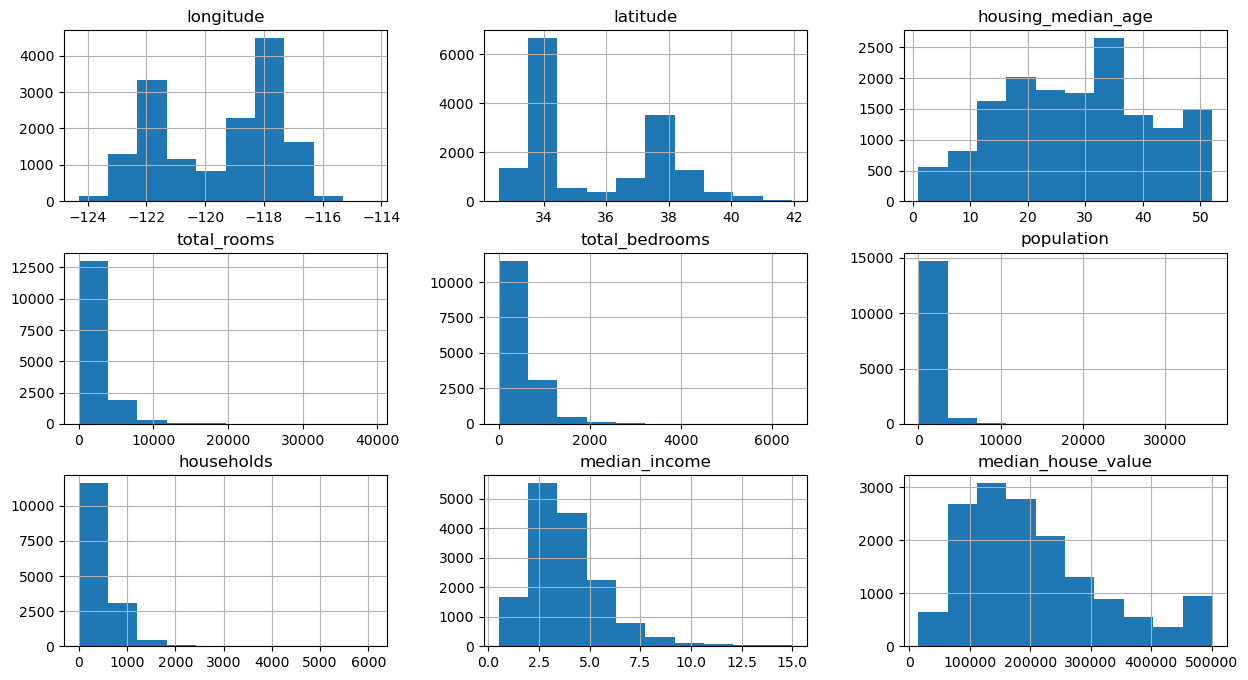

In [14]:
train_data.hist(figsize=(15,8))
plt.show()

In [15]:
train_data_numeric = train_data.select_dtypes(include=["number"])
train_data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924550,-0.110858,0.051522,0.072670,0.102169,0.058699,-0.013468,-0.045348
latitude,-0.924550,1.000000,0.011096,-0.042599,-0.069879,-0.110995,-0.073828,-0.081423,-0.144785
housing_median_age,-0.110858,0.011096,1.000000,-0.360056,-0.317070,-0.291609,-0.299197,-0.120187,0.111110
total_rooms,0.051522,-0.042599,-0.360056,1.000000,0.930114,0.855566,0.919416,0.199779,0.132170
total_bedrooms,0.072670,-0.069879,-0.317070,0.930114,1.000000,0.874019,0.979604,-0.007358,0.048378
population,0.102169,-0.110995,-0.291609,0.855566,0.874019,1.000000,0.903396,0.007233,-0.025533
households,0.058699,-0.073828,-0.299197,0.919416,0.979604,0.903396,1.000000,0.013925,0.063531
median_income,-0.013468,-0.081423,-0.120187,0.199779,-0.007358,0.007233,0.013925,1.000000,0.685429
median_house_value,-0.045348,-0.144785,0.111110,0.132170,0.048378,-0.025533,0.063531,0.685429,1.000000


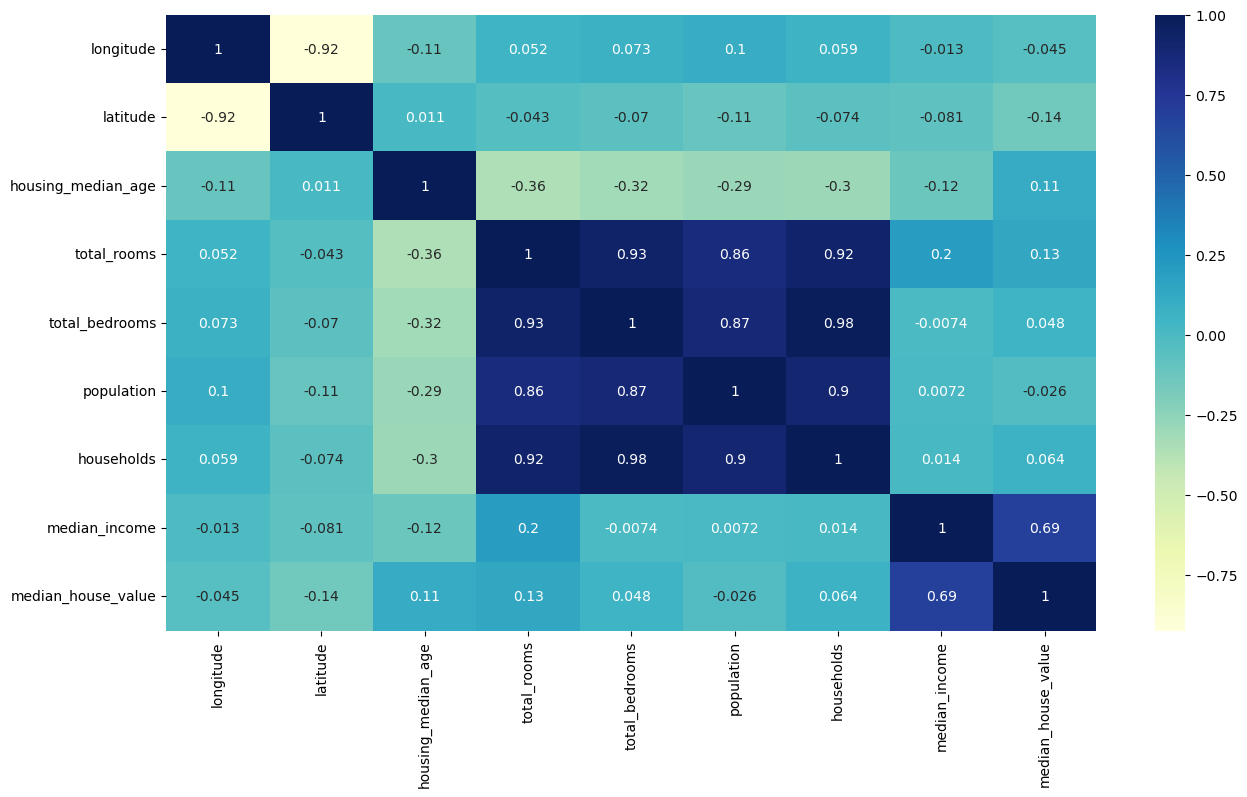

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.select_dtypes(include=["number"]).corr(), annot=True, cmap="YlGnBu")
plt.show()

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

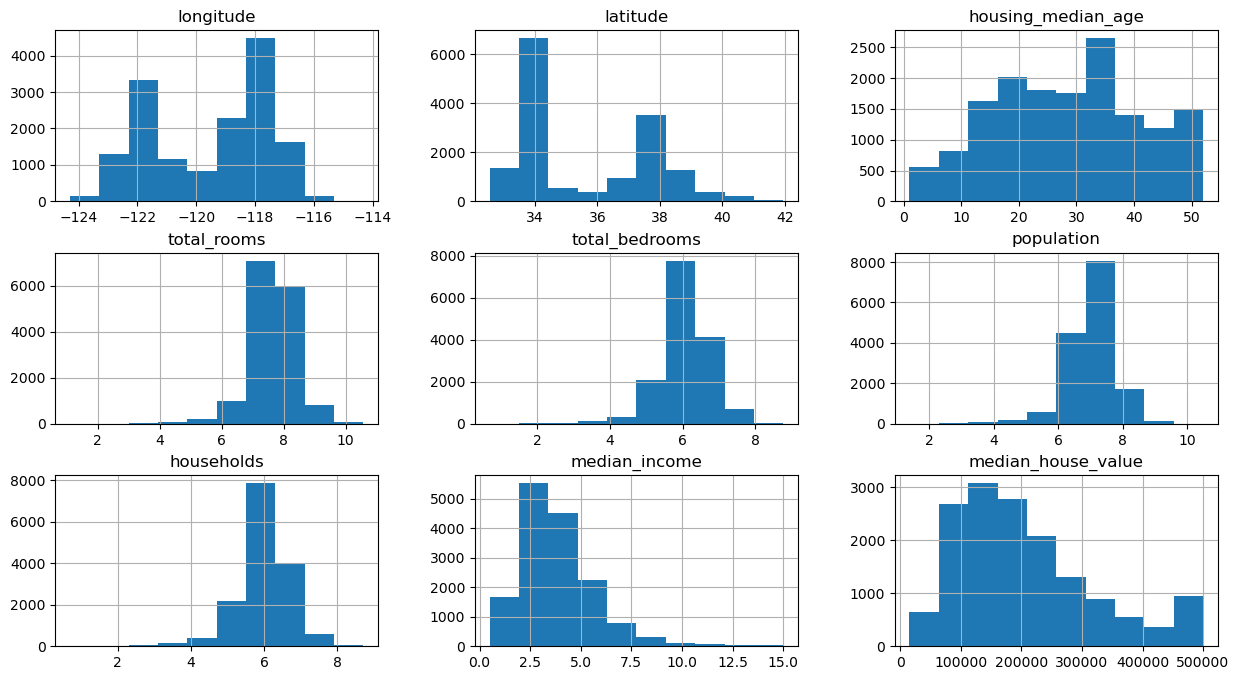

In [18]:
train_data.hist(figsize=(15,8))
plt.show()

In [19]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     6751
INLAND        4892
NEAR OCEAN    1972
NEAR BAY      1705
ISLAND           4
Name: count, dtype: int64

In [20]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

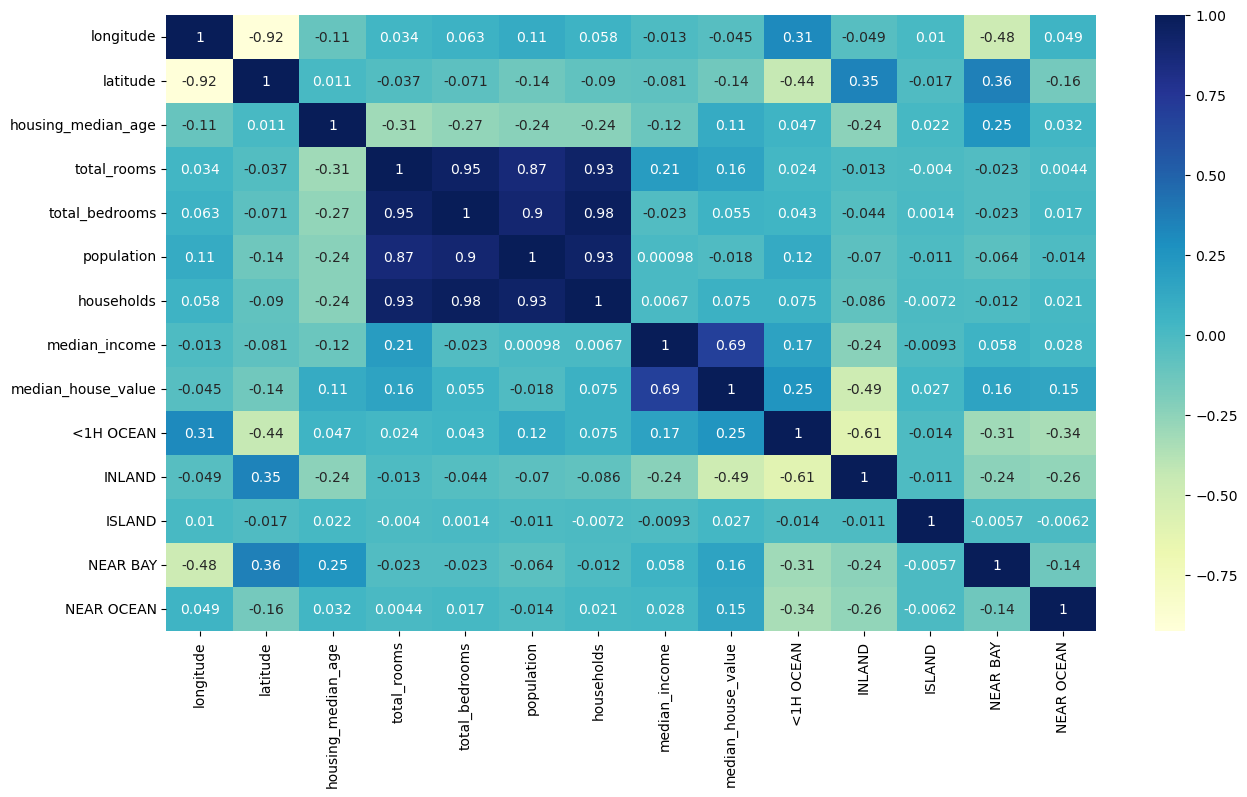

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

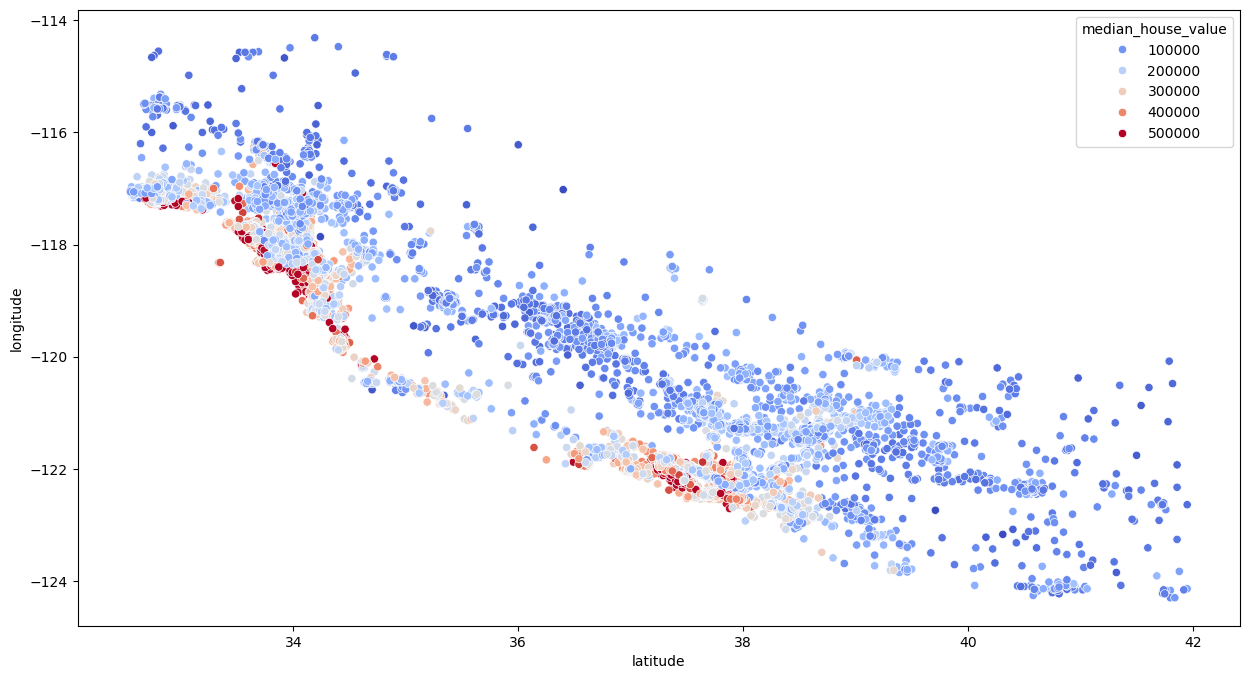

In [22]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [23]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['househols_rooms'] = train_data['total_rooms']/train_data['households']

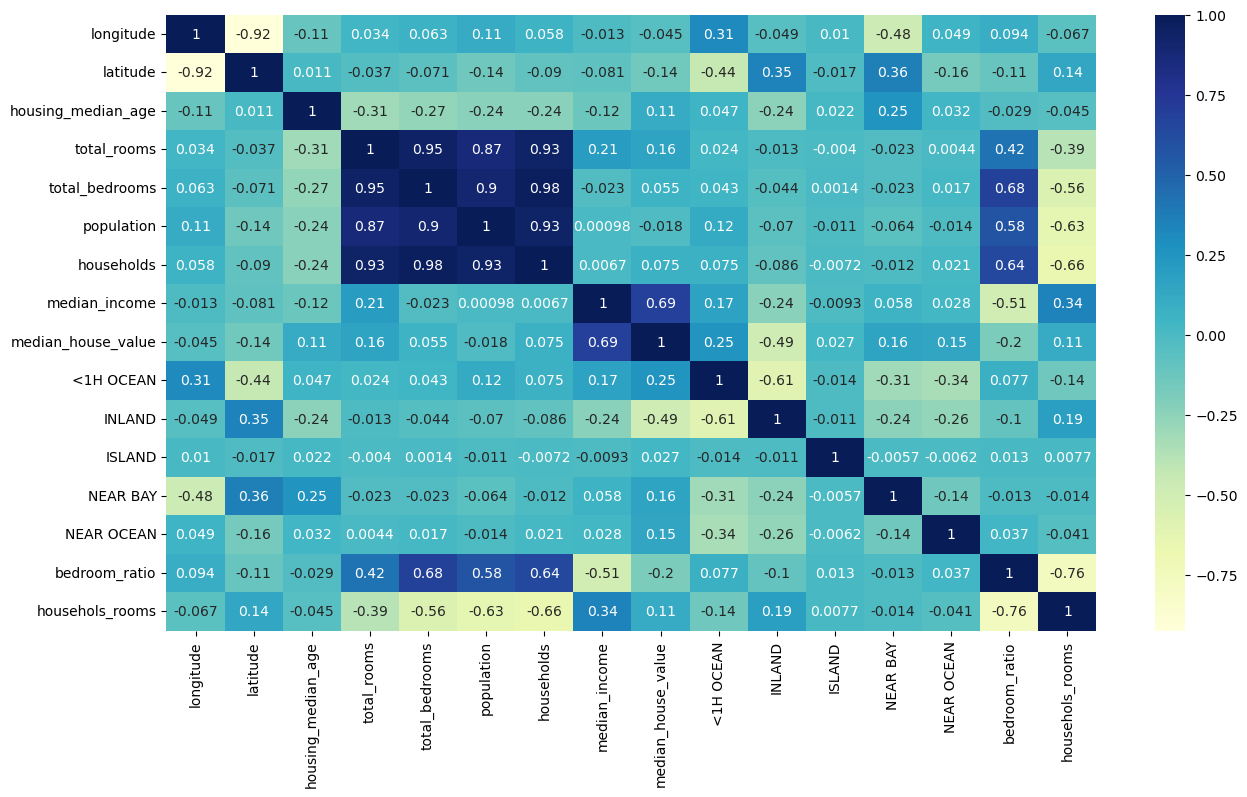

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")
plt.show()

# Model Training => Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

X_train ,  Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [26]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,househols_rooms
3572,-118.51,34.24,31.0,8.575085,6.499787,7.594381,6.489205,8.6454,True,False,False,False,False,0.757985,1.321438
8430,-118.36,33.92,19.0,7.940228,6.784457,7.344073,6.704414,2.6375,True,False,False,False,False,0.854441,1.184328
1718,-122.34,37.99,42.0,7.334329,5.789960,7.148346,5.934894,2.6167,False,False,False,True,False,0.789433,1.235798
7803,-118.10,33.90,40.0,7.539559,5.934894,7.114769,5.937536,4.4167,True,False,False,False,False,0.787167,1.269813
15587,-116.61,33.04,11.0,7.833204,6.289716,6.424869,5.598422,3.8750,False,True,False,False,False,0.802956,1.399181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,-121.75,36.77,25.0,7.524021,6.037871,7.425954,5.968708,3.2937,True,False,False,False,False,0.802479,1.260578
8648,-118.40,33.87,45.0,7.687997,6.226537,6.873164,6.156979,5.3816,True,False,False,False,False,0.809904,1.248664
13078,-121.34,38.56,12.0,7.998335,6.444131,7.273093,6.386879,2.9896,False,True,False,False,False,0.805684,1.252307
7065,-118.04,33.94,37.0,7.192182,5.613128,7.017506,5.620401,4.2051,True,False,False,False,False,0.780449,1.279656


In [27]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['househols_rooms'] = test_data['total_rooms']/test_data['households']

X_test , Y_test = test_data.drop(['median_house_value'],axis=1) , test_data['median_house_value']

In [28]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,househols_rooms
8101,-118.21,33.80,41.0,7.132498,5.634790,6.960348,5.631212,3.2778,150800.0,False,False,False,False,True,0.790016,1.266601
539,-122.29,37.78,42.0,7.124478,5.736572,6.711740,5.707110,1.9427,102200.0,False,False,False,True,False,0.805192,1.248351
9896,-122.26,38.29,10.0,6.877296,5.081404,6.180017,5.198497,6.5799,218100.0,False,False,False,True,False,0.738867,1.322939
8979,-118.42,34.00,45.0,7.499977,5.874931,6.784457,5.918894,5.0357,329800.0,True,False,False,False,False,0.783327,1.267125
12071,-117.56,33.86,25.0,8.848653,6.972606,8.083637,6.944087,5.2898,177100.0,False,True,False,False,False,0.787985,1.274272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,-118.43,33.83,19.0,8.733433,7.385231,7.806289,7.295056,5.1450,420200.0,False,False,False,False,True,0.845627,1.197171
16974,-122.31,37.56,45.0,7.491645,5.710427,6.721426,5.765191,4.9013,330100.0,False,False,False,False,True,0.762239,1.299462
3915,-118.52,34.19,37.0,7.353082,5.620401,6.638568,5.652489,3.8516,206900.0,True,False,False,False,False,0.764360,1.300857
16565,-121.46,37.73,20.0,7.620705,5.924256,6.760415,5.802118,5.1629,222900.0,False,True,False,False,False,0.777389,1.313435


In [29]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,househols_rooms
8101,-118.21,33.80,41.0,7.132498,5.634790,6.960348,5.631212,3.2778,False,False,False,False,True,0.790016,1.266601
539,-122.29,37.78,42.0,7.124478,5.736572,6.711740,5.707110,1.9427,False,False,False,True,False,0.805192,1.248351
9896,-122.26,38.29,10.0,6.877296,5.081404,6.180017,5.198497,6.5799,False,False,False,True,False,0.738867,1.322939
8979,-118.42,34.00,45.0,7.499977,5.874931,6.784457,5.918894,5.0357,True,False,False,False,False,0.783327,1.267125
12071,-117.56,33.86,25.0,8.848653,6.972606,8.083637,6.944087,5.2898,False,True,False,False,False,0.787985,1.274272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,-118.43,33.83,19.0,8.733433,7.385231,7.806289,7.295056,5.1450,False,False,False,False,True,0.845627,1.197171
16974,-122.31,37.56,45.0,7.491645,5.710427,6.721426,5.765191,4.9013,False,False,False,False,True,0.762239,1.299462
3915,-118.52,34.19,37.0,7.353082,5.620401,6.638568,5.652489,3.8516,True,False,False,False,False,0.764360,1.300857
16565,-121.46,37.73,20.0,7.620705,5.924256,6.760415,5.802118,5.1629,False,True,False,False,False,0.777389,1.313435


In [30]:
reg.score(X_test,Y_test)

0.6762307299360097

In [31]:
Y_test.shape

(5109,)

## Model Training => Random Forest Classifier

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Scale features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Train the model
reg = LinearRegression()
reg.fit(X_train_s, Y_train)

# Evaluate model
score = reg.score(X_test_s, Y_test)

score


0.6762307299360097

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest =  RandomForestRegressor()

forest.fit(X_train_s,Y_train)

RandomForestRegressor()

In [35]:
forest.score(X_test_s,Y_test)

0.8169965400103567

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4],
    "max_depth" : [None,4,8]
}

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

grid_search.fit(X_train_s,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [41]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [42]:
forest =  RandomForestRegressor()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [52]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [50]:
my_forest = grid_search.best_estimator_

In [51]:
my_forest.score(X_test_s,Y_test)

0.8206012163632179

### Thanks to NeuralNine

Check out this video for understanding => https://www.youtube.com/watch?v=Wqmtf9SA_kk&t=155s